# Курсовой проект по машинному обучению
## Car price prediction
## Использование произвольных автомобильных данных для анализа предсказание цен на автомобили.

### Описание признаков
##### name: Название автомобиля (марка и модель),
##### company: Компания-производитель,
##### year: Год выпуска автомобиля,
##### price: Цена автомобиля,
##### kms_driven: Пробег автомобиля в километрах,
##### fuel_type: Тип топлива, используемого автомобилем,
##### color: Цвет автомобиля


In [365]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.style.use('ggplot')

In [366]:
data=pd.read_csv('dataset/car_csv.csv')

In [367]:
data.head(10)

,ID,name,company,year,price,kms_driven,fuel_type,color,volume
0,1,K5,KIA,2019,25000,85000,Petrol,Black,2.5
1,2,K5,KIA,2016,18000,120000,LPG,White,2.0
2,3,K5,KIA,2020,27000,65000,LPG,Blue,2.0
3,4,K5,KIA,2018,22000,140000,Petrol,Silver,2.5
4,5,K5,KIA,2017,20000,90000,LPG,Gray,2.0
5,6,K5,KIA,2021,30000,45000,LPG,White,2.0
6,7,K5,KIA,2019,25000,85000,Petrol,Black,2.5
7,8,K5,KIA,2016,18000,120000,LPG,White,2.0
8,9,K5,KIA,2020,27000,65000,LPG,Blue,2.0
9,10,K5,KIA,2018,22000,140000,Petrol,Silver,2.5


In [368]:
data.shape

(987, 9)

In [369]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 987 entries, 0 to 986
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          987 non-null    int64  
 1   name        987 non-null    object 
 2   company     987 non-null    object 
 3   year        987 non-null    int64  
 4   price       987 non-null    int64  
 5   kms_driven  987 non-null    int64  
 6   fuel_type   987 non-null    object 
 7   color       987 non-null    object 
 8   volume      987 non-null    float64
dtypes: float64(1), int64(4), object(4)
memory usage: 69.5+ KB


In [370]:
data.describe()

,ID,year,price,kms_driven,volume
count,987.00000,987.000000,987.000000,987.000000,987.000000
mean,501.45998,2013.217832,14949.782168,142494.036474,1.731206
std,291.00340,7.261849,7609.206425,93807.400392,0.432361
min,1.00000,2001.000000,4077.000000,100.000000,1.000000
25%,247.50000,2006.000000,8000.000000,65000.000000,1.300000
50%,508.00000,2017.000000,13000.000000,120000.000000,1.500000
75%,754.50000,2020.000000,22000.000000,215000.000000,2.000000
max,1000.00000,2024.000000,32500.000000,550000.000000,2.500000


In [371]:
data.isnull().sum()

ID            0
name          0
company       0
year          0
price         0
kms_driven    0
fuel_type     0
color         0
volume        0
dtype: int64

In [372]:
data['company'].unique()

array(['KIA', 'HONDA'], dtype=object)

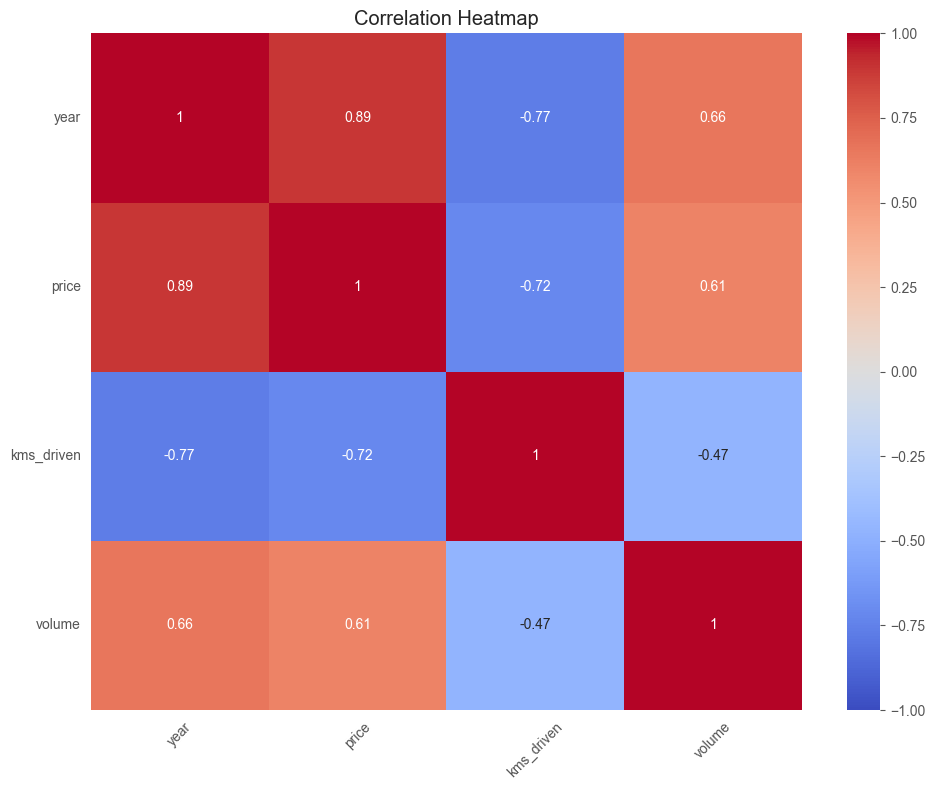

In [373]:
import seaborn as sns

# Вычисление корреляций
numeric_cols = ['year', 'price', 'kms_driven','volume']
corr_matrix = data[numeric_cols].corr()

# Построение тепловой карты с помощью Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## Построение модели

In [374]:
# Разделение данных на X и Y
X=data[['name','company','year','kms_driven','fuel_type','volume','color']]
y=data['price']

In [375]:
# выводим X
X

,name,company,year,kms_driven,fuel_type,volume,color
0,K5,KIA,2019,85000,Petrol,2.5,Black
1,K5,KIA,2016,120000,LPG,2.0,White
2,K5,KIA,2020,65000,LPG,2.0,Blue
3,K5,KIA,2018,140000,Petrol,2.5,Silver
4,K5,KIA,2017,90000,LPG,2.0,Gray
...,...,...,...,...,...,...,...
982,FIT,HONDA,2022,30000,Petrol,1.3,Green
983,FIT,HONDA,2020,70000,Petrol,1.3,Black
984,FIT,HONDA,2021,18000,Petrol,1.5,White
985,FIT,HONDA,2020,75000,Petrol,1.3,Gray


#### Импортирование нужных библиотек

In [376]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [377]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [378]:
#Преобразование категориальных переменных в бинарные 
ohe=OneHotEncoder()
ohe.fit(X[['name','company','fuel_type','color']])

OneHotEncoder()

In [379]:
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['name','company','fuel_type','color']),
remainder='passthrough')

## Использование Decision Tree Regrossor

In [380]:
dtr=DecisionTreeRegressor()

In [381]:
pipe=make_pipeline(column_trans,dtr)

In [382]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['FIT', 'K5'], dtype=object),
                                                                            array(['HONDA', 'KIA'], dtype=object),
                                                                            array(['LPG', 'Petrol', 'Petroll'], dtype=object),
                                                                            array(['Black', 'Blue', 'Gray', 'Green', 'Red', 'Silver', 'White',
       'Yellow'], dtype=object)]),
                                                  ['name', 'company',
                                                   'fuel_type', 'color'])])),
                ('decisiontreeregressor', DecisionTreeRegressor())])

In [383]:
y_pred=pipe.predict(X_test)

In [384]:
r2 = r2_score(y_test,y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print('Model: Decision Tree ')
print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')

Model: Decision Tree 
Mean Squared Error: 3532042.07
R^2 Score: 0.94


In [385]:
pipe.predict(pd.DataFrame(columns=X_test.columns,data=np.array(['FIT','HONDA',2003,130000,'Petrol',1.3,'Black']).reshape(1,7)))

array([6550.])

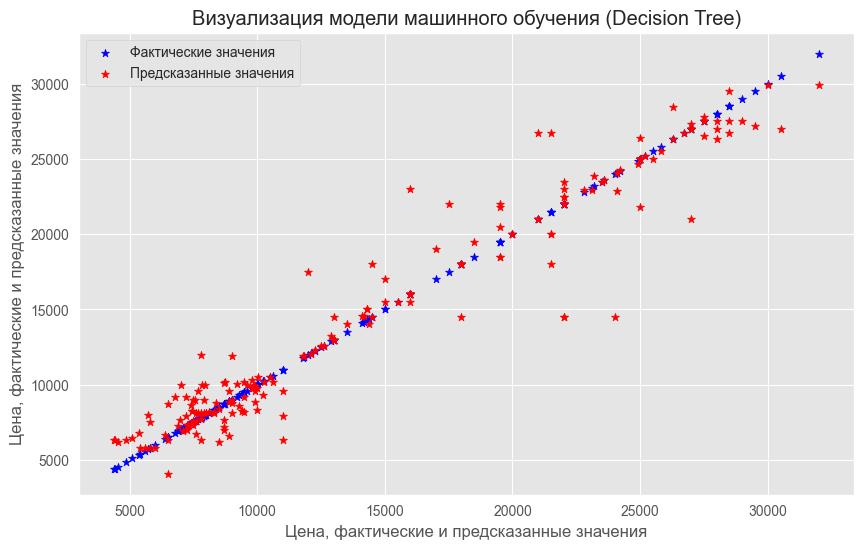

In [386]:
# Визуализация модели
plt.figure(figsize=(10, 6))

# График фактических и предсказанных значений
plt.scatter(y_test, y_test, color='blue', marker='*', label='Фактические значения')
plt.scatter(y_test, y_pred, color='red', marker='*', label='Предсказанные значения')

plt.title('Визуализация модели машинного обучения (Decision Tree)')
plt.xlabel('Цена, фактические и предсказанные значения')
plt.ylabel('Цена, фактические и предсказанные значения')
plt.legend()
plt.grid(True)
plt.show()

In [387]:
## Random Forest
rf = RandomForestRegressor()

In [388]:
pipeRF=make_pipeline(column_trans,rf)

In [389]:
pipeRF.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['FIT', 'K5'], dtype=object),
                                                                            array(['HONDA', 'KIA'], dtype=object),
                                                                            array(['LPG', 'Petrol', 'Petroll'], dtype=object),
                                                                            array(['Black', 'Blue', 'Gray', 'Green', 'Red', 'Silver', 'White',
       'Yellow'], dtype=object)]),
                                                  ['name', 'company',
                                                   'fuel_type', 'color'])])),
                ('randomforestregressor', RandomForestRegressor())])

In [390]:
y_predRF=pipeRF.predict(X_test)

In [391]:
r2 = r2_score(y_test,y_predRF)
mae = mean_absolute_error(y_test, y_predRF)
mse = mean_squared_error(y_test, y_predRF)

print('Model: Random Forest ')
print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')

Model: Random Forest 
Mean Squared Error: 2462851.86
R^2 Score: 0.96


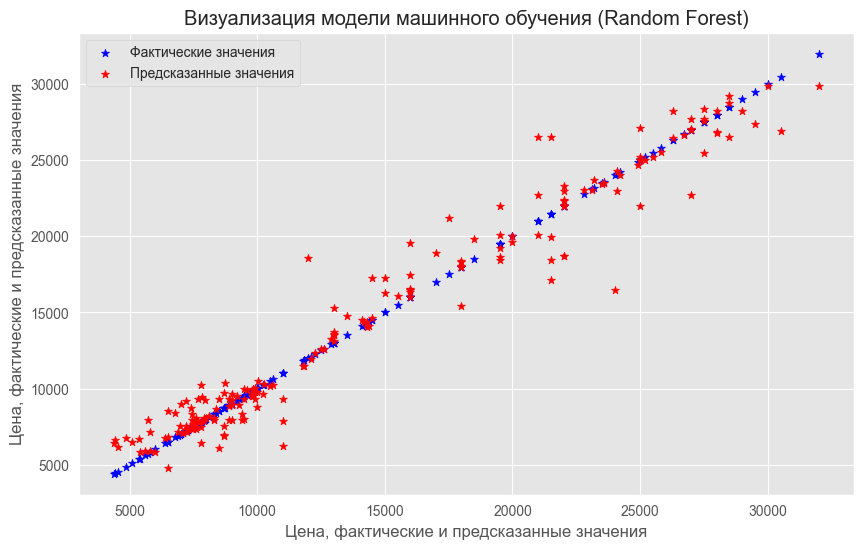

In [392]:
# Визуализация модели
plt.figure(figsize=(10, 6))

# График фактических и предсказанных значений
plt.scatter(y_test, y_test, color='blue', marker='*', label='Фактические значения')
plt.scatter(y_test, y_predRF, color='red', marker='*', label='Предсказанные значения')

plt.title('Визуализация модели машинного обучения (Random Forest)')
plt.xlabel('Цена, фактические и предсказанные значения')
plt.ylabel('Цена, фактические и предсказанные значения')
plt.legend()
plt.grid(True)
plt.show()

### Linear Regression

In [393]:
lr = LinearRegression()
pipeLR = make_pipeline(column_trans, lr)
pipeLR.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['FIT', 'K5'], dtype=object),
                                                                            array(['HONDA', 'KIA'], dtype=object),
                                                                            array(['LPG', 'Petrol', 'Petroll'], dtype=object),
                                                                            array(['Black', 'Blue', 'Gray', 'Green', 'Red', 'Silver', 'White',
       'Yellow'], dtype=object)]),
                                                  ['name', 'company',
                                                   'fuel_type', 'color'])])),
                ('linearregression', LinearRegression())])

In [394]:
y_predLR=pipeLR.predict(X_test)

In [395]:
r2 = r2_score(y_test,y_predLR)
mae = mean_absolute_error(y_test, y_predLR)
mse = mean_squared_error(y_test, y_predLR)

print('Model: Random Forest ')
print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')

Model: Random Forest 
Mean Squared Error: 7747745.33
R^2 Score: 0.86


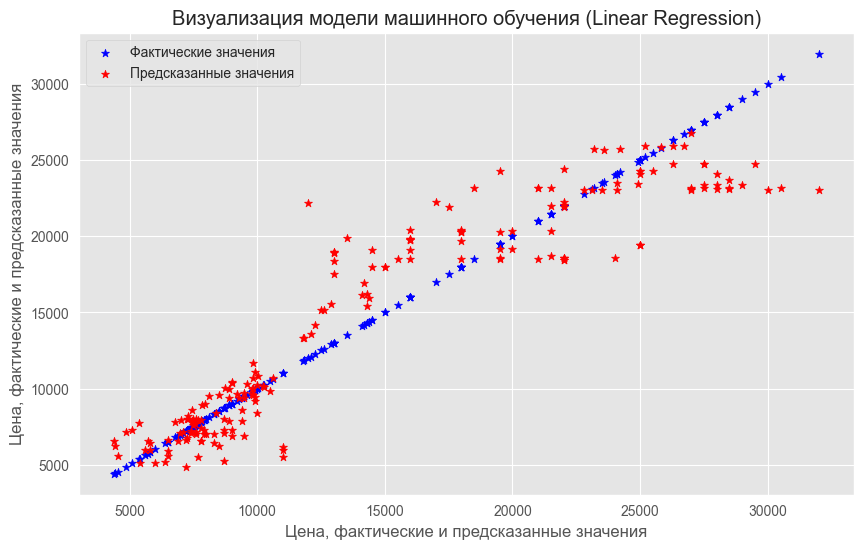

In [396]:
# Визуализация модели
plt.figure(figsize=(10, 6))

# График фактических и предсказанных значений
plt.scatter(y_test, y_test, color='blue', marker='*', label='Фактические значения')
plt.scatter(y_test, y_predLR, color='red', marker='*', label='Предсказанные значения')

plt.title('Визуализация модели машинного обучения (Linear Regression)')
plt.xlabel('Цена, фактические и предсказанные значения')
plt.ylabel('Цена, фактические и предсказанные значения')
plt.legend()
plt.grid(True)
plt.show()

###  Выбор модели 

### Самой лечшей модели стал random forest
#### Model: Random Forest 
#### Mean Squared Error: 2656910.74
#### R^2 Score: 0.96

### Импортирование данных в pickle

In [397]:
import pickle
pickle.dump(pipeRF,open('RandomForestRegressionModel.pkl','wb'))

In [398]:
pipeRF.predict(pd.DataFrame(columns=X_test.columns,data=np.array(['FIT','HONDA',2003,100000,'Petrol',1.3,'Black']).reshape(1,7)))

array([7429.94880952])

In [399]:
pipe.steps[0][1].transformers[0][1].categories[0]

array(['FIT', 'K5'], dtype=object)